# Dark Matter Fraction : Comparison with observational data 

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import glob
from scipy import stats


#################
# Plot parameters
params = {
    "font.size": 20,
    "font.family": "Arial Black",
    "text.usetex": True,
    "mathtext.fontset": "custom",
    "figure.figsize": (4, 3),
    "figure.subplot.left": 0.15,
    "figure.subplot.right": 0.95,
    "figure.subplot.bottom": 0.16,
    "figure.subplot.top": 0.95,
    "figure.subplot.wspace": 0.3,
    "figure.subplot.hspace": 0.3,
    "lines.markersize": 2,
    "lines.linewidth": 1.5,
}
plt.rcParams.update(params)
G = 6.67e-11
K = 1.65**2
kpc = 3.085e16*1e3
##################
# Halo Class

class classhalo:
    def __init__(self, file_path, type = 'all' ):
        self.file_path = file_path
        self.get_group_attributes(type)

    def get_group_attributes(self, type):
        with h5py.File(self.file_path, "r") as file:
            halo_data_group = file["Halo_data"]
            profile_data_group = file["Profile_data"]
            
            self.kappa = halo_data_group["kappa"][:]
            if type == 'disk':
                select = np.where(halo_data_group["kappa"][:] >= 0.3)[0]
            if type == 'elliptical':
                select = np.where(halo_data_group["kappa"][:] < 0.3)[0]
            if type == 'all':
                select = np.where(halo_data_group["kappa"][:] > 0)[0]
            

            # Halo_data attributes
            self.AxisRadius = halo_data_group["AxisRadius"][:]
            self.CrossSection = halo_data_group["CrossSection"][:, select]
            self.DMMajorAxis_a = halo_data_group["DMMajorAxis_a"][:, select]
            self.DMMinorAxis_b = halo_data_group["DMMinorAxis_b"][:, select]
            self.DMMinorAxis_c = halo_data_group["DMMinorAxis_c"][:, select]
            self.DMNparticlesWithinAxisRadius = halo_data_group["DMNparticlesWithinAxisRadius"][:, select]
            self.DynamicalRelaxation = halo_data_group["DynamicalRelaxation"][select]
            self.GalaxyHalfLightRadius = halo_data_group["GalaxyHalfLightRadius"][select]
            self.GalaxyHalfMassRadius = halo_data_group["GalaxyHalfMassRadius"][select]
            self.GalaxyLuminosity = halo_data_group["GalaxyLuminosity"][select]
            self.GalaxyProjectedHalfLightRadius = halo_data_group["GalaxyProjectedHalfLightRadius"][select]
            self.GalaxyProjectedHalfMassRadius = halo_data_group["GalaxyProjectedHalfMassRadius"][select]
            self.ID = halo_data_group["ID"][select]
            self.M200c = halo_data_group["M200c"][select]
            self.Metallicity = halo_data_group["Metallicity"][select]
            self.Mgas = halo_data_group["Mgas"][select]
            self.Mstar = halo_data_group["Mstar"][select]
            self.R200c = halo_data_group["R200c"][select]
            self.SFR = halo_data_group["SFR"][select]
            self.SpecificAngularMomentum = halo_data_group["SpecificAngularMomentum"][select,:]
            self.StructureType = halo_data_group["StructureType"][select]
            self.Vmax = halo_data_group["Vmax"][select]
            self.c200c = halo_data_group["c200c"][select]

            sarg =0

            # Profile_data attributes
            self.Circular_Velocity = profile_data_group["Circular_Velocity"][:, select]
            self.Dark_matter_Circular_Velocity = profile_data_group["Dark_matter_Circular_Velocity"][:, select]
            self.Dark_matter_Density_profile = profile_data_group["Dark_matter_Density_profile"][sarg:,select]
            self.Dark_matter_Sigma_profile = profile_data_group["Dark_matter_Sigma_profile"][sarg:,select]
            self.Dark_matter_Velocity_dispersion = profile_data_group["Dark_matter_Velocity_dispersion"][sarg:,select]
            self.Density_profile = profile_data_group["Density_profile"][sarg:,select]
            self.Density_radial_bins = profile_data_group["Density_radial_bins"][sarg:]
            self.Gas_Circular_Velocity = profile_data_group["Gas_Circular_Velocity"][:,select]
            self.Gas_Density_profile = profile_data_group["Gas_Density_profile"][sarg:,select]
            self.Gas_Velocity_dispersion = profile_data_group["Gas_Velocity_dispersion"][sarg:,select]
            self.Stars_Circular_Velocity = profile_data_group["Stars_Circular_Velocity"][:,select]
            self.Stars_Density_profile = profile_data_group["Stars_Density_profile"][sarg:,select]
            self.Stars_Velocity_dispersion = profile_data_group["Stars_Velocity_dispersion"][sarg:,select]
            self.Velocity_radial_bins = profile_data_group["Velocity_radial_bins"][:]




            self.fDM = (profile_data_group["Dark_matter_Circular_Velocity"][:,select]/profile_data_group["Circular_Velocity"][:,select])**2


       
        
file_paths = ['Halo_data_L025N376WeakStellarFBSigmaVelDep60Anisotropic.hdf5',
              'Halo_data_L025N376WeakStellarFBSigmaVelDep30Anisotropic.hdf5',
              'Halo_data_L025N376WeakStellarFBSigmaConstant00.hdf5',
              'Halo_data_L025N376ReferenceSigmaConstant00.hdf5', 
              'Halo_data_L025N376ReferenceSigmaVelDep30Anisotropic.hdf5', 
              'Halo_data_L025N376ReferenceSigmaVelDep60Anisotropic.hdf5']

file_names = ['WSFB60', 'WSFB30', 'WSFBconst', 'Ref60', 'Ref30', 'Refconst']


## Dark Matter Fraction as a function of the Stellar Mass

/tmp/ipykernel_2435811/2769655278.py:99: RuntimeWarning: divide by zero encountered in divide
  self.fDM = (profile_data_group["Dark_matter_Circular_Velocity"][:,select]/profile_data_group["Circular_Velocity"][:,select])**2
/tmp/ipykernel_2435811/2769655278.py:99: RuntimeWarning: invalid value encountered in divide
  self.fDM = (profile_data_group["Dark_matter_Circular_Velocity"][:,select]/profile_data_group["Circular_Velocity"][:,select])**2
/tmp/ipykernel_2435811/2769655278.py:99: RuntimeWarning: divide by zero encountered in divide
  self.fDM = (profile_data_group["Dark_matter_Circular_Velocity"][:,select]/profile_data_group["Circular_Velocity"][:,select])**2
/miniconda3/envs/JupyHub2023_novembre/lib/python3.11/site-packages/scipy/stats/_binned_statistic.py:609: RuntimeWarning: invalid value encountered in subtract
  delta = values[vv] - flatsum[binnumbers] / flatcount[binnumbers]
/tmp/ipykernel_2435811/2769655278.py:99: RuntimeWarning: invalid value encountered in divide
  self.fDM

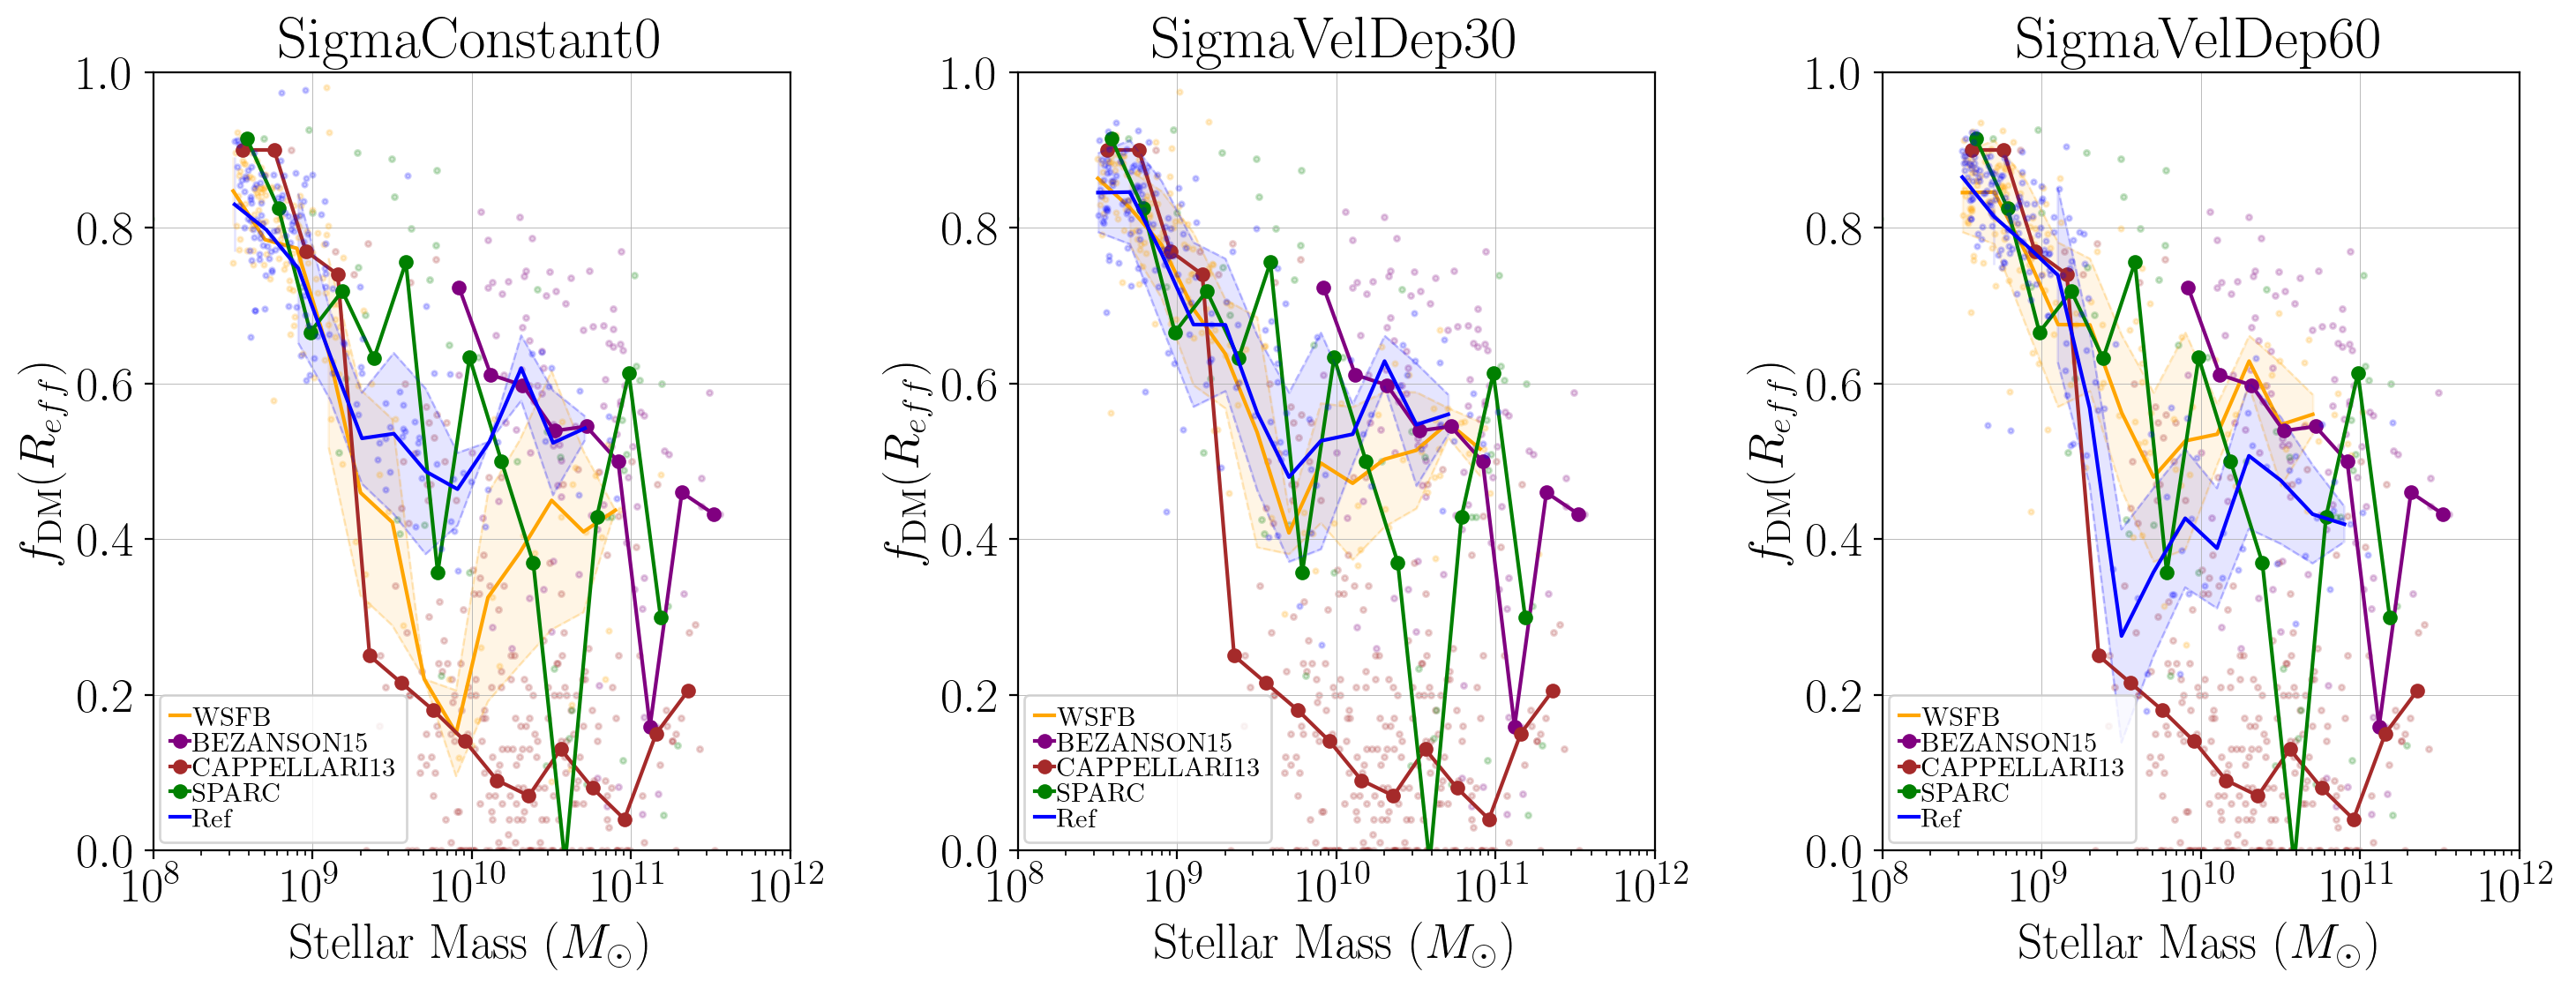

In [38]:
files = glob.glob('dataset/*.csv')

# Define data
file_paths = ['Halo_data_L025N376WeakStellarFBSigmaConstant00.hdf5',
              'Halo_data_L025N376ReferenceSigmaConstant00.hdf5',
              'Halo_data_L025N376WeakStellarFBSigmaVelDep30Anisotropic.hdf5',
              'Halo_data_L025N376ReferenceSigmaVelDep30Anisotropic.hdf5', 
              'Halo_data_L025N376ReferenceSigmaVelDep30Anisotropic.hdf5', 
              'Halo_data_L025N376WeakStellarFBSigmaVelDep60Anisotropic.hdf5']

file_names = ['WSFB', 'Ref', 'WSFB', 'Ref', 'WSFB', 'Ref']
titles = ['SigmaConstant0', 'SigmaVelDep30', 'SigmaVelDep60']
colors = ['orange', 'blue']
names = []
tab = np.array([0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 19, 21, 23, 25, 26, 27, 30, 
                31, 33, 35, 38, 39, 40, 41, 50, 51, 52, 53, 57, 58, 59, 61, 64, 68, 75, 78, 79,
                81, 83, 84, 87, 89, 90, 91, 92, 93, 94, 95, 97, 99])
fig, axs = plt.subplots(1, 3, figsize=(15, 6), dpi=200)

for j, file_path in enumerate(file_paths):
    colors = ['orange', 'blue']
    
    ax = axs[j // 2]

    halo = classhalo(file_path, type='elliptical')

    M = 10**halo.Mstar
    fDM = halo.fDM
    f = []
    for k in range(len(fDM[0, :])):
        f.append(np.interp(halo.GalaxyHalfLightRadius[k], halo.Velocity_radial_bins, fDM[:, k]))

    ax.plot(M, f, 'o',  c=colors[j % 2], alpha=0.2)

    bins = np.arange(halo.Mstar.min(), halo.Mstar.max(), 0.2)
    bins = 10**bins
    bin_means, bin_edges, _ = stats.binned_statistic(M, f, bins=bins, statistic='median')
    bin_std, _, _ = stats.binned_statistic(M, f, bins=bins, statistic='std')

    ax.plot(bin_edges[:-1], bin_means + bin_std, '--', color=colors[j % 2], linewidth=0.8, alpha=0.2)
    ax.plot(bin_edges[:-1], bin_means - bin_std, '--', color=colors[j % 2], linewidth=0.8, alpha=0.2)

    ax.plot(bin_edges[:-1], bin_means, linestyle='-', label=file_names[j], c=colors[j % 2])
    ax.fill_between(bin_edges[:-1], bin_means - bin_std, bin_means + bin_std, alpha=0.1, color=colors[j % 2])
    ax.legend(loc=[0.01, 0.01], labelspacing=0.05,
              handlelength=0.7, handletextpad=0.1,
              frameon=True, fontsize=11, ncol=1)

    ax.set_xlabel(r'Stellar Mass ($M_{\odot}$)')
    ax.set_ylabel(r'$f_{\mathrm{DM}}(R_{eff})$')
    ax.set_ylim([0, 1])
    ax.set_xlim([10**8, 10**12])
    ax.set_xscale('log')
    ax.grid(linestyle='-', linewidth=0.3)
    ax.set_title(titles[j // 2])

    ######## Obs
    if j % 2 == 0:
        for k, file_path in enumerate(files):
            colors = ['purple', 'brown', 'green']
            file_path = files[k]
            name = file_path.split('/')[-1].split('.')[0]
            df = pd.read_csv(file_path)
            M = np.float64(np.array(df["M*"].iloc[1:].values))
            fDMReff = np.array(df['fDM(Reff)'].iloc[1:].values)
            sigma_fdmReff = np.array(df['sigma_fdm(Reff)'].iloc[1:].values)
            # Adding the transformation from Salpeter IMF to Chabrier.
            if name == 'CAPPELLARI13':
                M = 10**(np.log10(M)-0.25)
            if name == 'SPARC':
                M = M[tab]
                fDMReff = fDMReff[tab]
                sigma_fdmReff = sigma_fdmReff[tab]
            ax.scatter(M, fDMReff, color=colors[k], s=5, alpha = 0.2)
            #ax.errorbar(M, fDMReff, yerr=sigma_fdmReff, fmt='o', capsize=1, capthick=1, color=colors[k], alpha = 0.2)
            bins = np.arange(np.log10(M.min()), np.log(M.max()), 0.2)
            bins = 10**bins
            bin_means, bin_edges, _ = stats.binned_statistic(M, fDMReff, bins=bins, statistic='median')
            bin_std, _, _ = stats.binned_statistic(M, fDMReff, bins=bins, statistic='std')

            ax.plot(bin_edges[:-1], bin_means, linestyle='-', marker='o', label=name, c=colors[k], markersize = 5)

            ax.legend(loc=[0.01, 0.01], labelspacing=0.05,
                      handlelength=0.7, handletextpad=0.1,
                      frameon=True, fontsize=11, ncol=1)
plt.tight_layout()
#plt.savefig('fDMvsStelM.pdf')
#plt.savefig('fDMvsStelM.png')
plt.show()


## Dark Matter Fraction as a function of the effective radius

/tmp/ipykernel_2435811/2769655278.py:99: RuntimeWarning: divide by zero encountered in divide
  self.fDM = (profile_data_group["Dark_matter_Circular_Velocity"][:,select]/profile_data_group["Circular_Velocity"][:,select])**2
/tmp/ipykernel_2435811/2769655278.py:99: RuntimeWarning: invalid value encountered in divide
  self.fDM = (profile_data_group["Dark_matter_Circular_Velocity"][:,select]/profile_data_group["Circular_Velocity"][:,select])**2
/tmp/ipykernel_2435811/2769655278.py:99: RuntimeWarning: divide by zero encountered in divide
  self.fDM = (profile_data_group["Dark_matter_Circular_Velocity"][:,select]/profile_data_group["Circular_Velocity"][:,select])**2
/tmp/ipykernel_2435811/2769655278.py:99: RuntimeWarning: invalid value encountered in divide
  self.fDM = (profile_data_group["Dark_matter_Circular_Velocity"][:,select]/profile_data_group["Circular_Velocity"][:,select])**2
/tmp/ipykernel_2435811/2769655278.py:99: RuntimeWarning: divide by zero encountered in divide
  self.fDM =

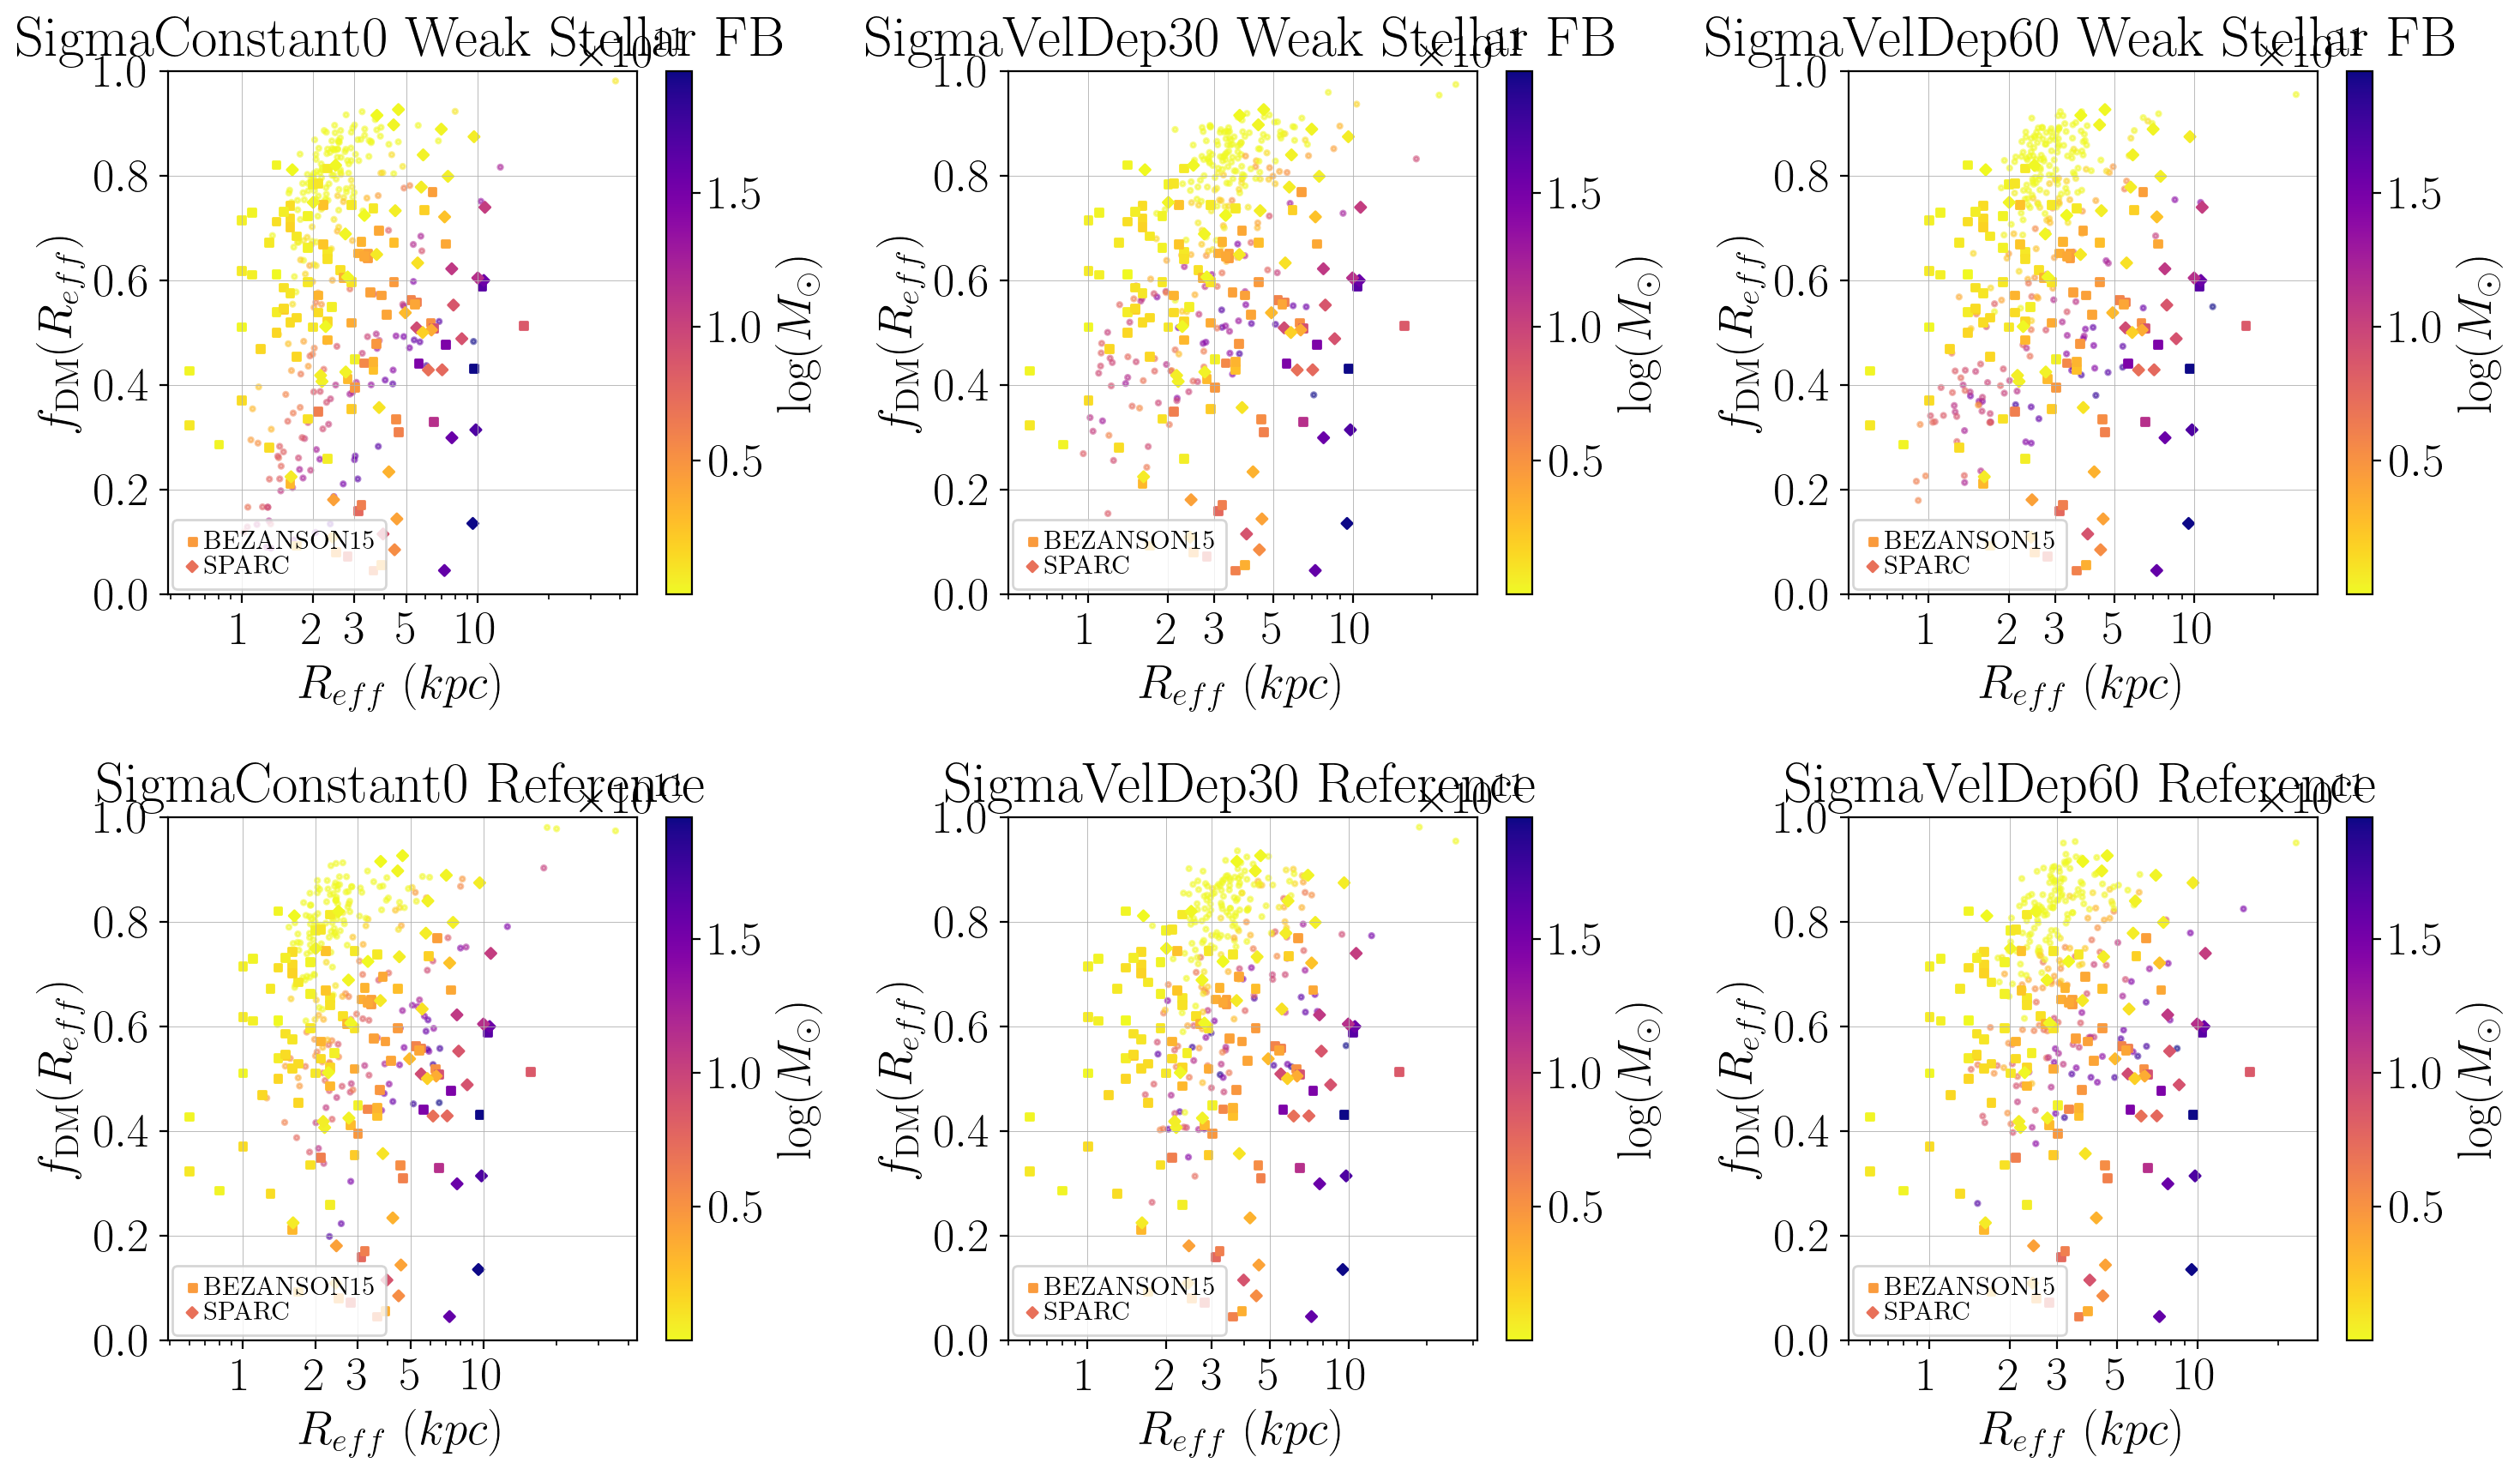

In [75]:
maxval = 6e12
minval = 1e8

nb = 0.2
file_paths = ['Halo_data_L025N376WeakStellarFBSigmaConstant00.hdf5',
              'Halo_data_L025N376WeakStellarFBSigmaVelDep30Anisotropic.hdf5',
              'Halo_data_L025N376WeakStellarFBSigmaVelDep60Anisotropic.hdf5',
              'Halo_data_L025N376ReferenceSigmaConstant00.hdf5', 
              'Halo_data_L025N376ReferenceSigmaVelDep30Anisotropic.hdf5', 
              'Halo_data_L025N376ReferenceSigmaVelDep60Anisotropic.hdf5']

file_names = ['Weak Stellar FB', 'Weak Stellar FB', 'Weak Stellar FB', 'Reference', 'Reference', 'Reference']
titles = ['SigmaConstant0', 'SigmaVelDep30', 'SigmaVelDep60', 'SigmaConstant0', 'SigmaVelDep30', 'SigmaVelDep60']

files = glob.glob('dataset/*.csv')
files[1] = files[-1]
files = files[:-1]
fig, axs = plt.subplots(2, 3, figsize=(15, 9), dpi=200)

for j, file_path in enumerate(file_paths):
    colors = ['orange', 'blue']
    row = j // 3
    col = j % 3

    ax = axs[row, col]


    ax.set_xlabel(r'$R_{eff}$ ($kpc$)')
    ax.set_ylabel(r'$f_{\mathrm{DM}}(R_{eff})$')
    ax.set_ylim([0, 1])
    ax.set_xscale('log')
    ax.set_xticks([1,2,3,5,10], ['1','2','3','5','10'])
    ax.grid(linestyle='-', linewidth=0.3)
    ax.set_title(titles[j] + ' ' + file_names[j])

    halo = classhalo(file_path, type='all')
    i = np.where((10**halo.Mstar<maxval) & (10**halo.Mstar>minval))[0]

    Reff = halo.GalaxyHalfLightRadius[i]
    fDM = halo.fDM[:,i]
    f = []
    for k in range(len(fDM[0, :])):
        f.append(np.interp(halo.GalaxyHalfLightRadius[k], halo.Velocity_radial_bins, fDM[:, k]))

    ax.scatter(Reff, f, c=halo.Mstar[i], cmap = 'plasma_r', vmin = 9, alpha = 0.5)
    
    if j%1==0:
        for k, file_path in enumerate(files):
            marker = 's'
            colors = ['purple', 'brown', 'green']
            file_path = files[k]
            name = file_path.split('/')[-1].split('.')[0]
            df = pd.read_csv(file_path)
            M = np.float64(np.array(df["Reff"].iloc[1:].values))
            fDMReff = np.array(df['fDM(Reff)'].iloc[1:].values)
            sigma_fdmReff = np.array(df['sigma_fdm(Reff)'].iloc[1:].values)
            mapmass = np.float64(np.array(df["M*"].iloc[1:].values))
            # Adding the transformation from Salpeter IMF to Chabrier.
            if name == 'CAPPELLARI13':
                M = 10**(np.log10(M)-0.25)
            if name == 'SPARC':
                M = M[tab]
                mapmass = mapmass[tab]
                fDMReff = fDMReff[tab]
                sigma_fdmReff = sigma_fdmReff[tab]
                marker = 'D'
            # Utilisation des couleurs définies pour chaque type de données
            sc = ax.scatter(M, fDMReff, c = mapmass, cmap = 'plasma_r', s=10, marker = marker, label = name)
            
            ax.legend(loc=[0.01, 0.01], labelspacing=0.05,
                      handlelength=0.7, handletextpad=0.1,
                      frameon=True, fontsize=11, ncol=1)
        plt.colorbar(sc, ax = ax, label = r'log($M_{\odot})$')

plt.tight_layout()
#plt.savefig('fDMvsR.pdf')
#plt.savefig('fDMvsR.png')
plt.show()


/tmp/ipykernel_2435811/2769655278.py:99: RuntimeWarning: divide by zero encountered in divide
  self.fDM = (profile_data_group["Dark_matter_Circular_Velocity"][:,select]/profile_data_group["Circular_Velocity"][:,select])**2
/tmp/ipykernel_2435811/2769655278.py:99: RuntimeWarning: invalid value encountered in divide
  self.fDM = (profile_data_group["Dark_matter_Circular_Velocity"][:,select]/profile_data_group["Circular_Velocity"][:,select])**2
/miniconda3/envs/JupyHub2023_novembre/lib/python3.11/site-packages/scipy/stats/_binned_statistic.py:609: RuntimeWarning: invalid value encountered in subtract
  delta = values[vv] - flatsum[binnumbers] / flatcount[binnumbers]
/tmp/ipykernel_2435811/2769655278.py:99: RuntimeWarning: divide by zero encountered in divide
  self.fDM = (profile_data_group["Dark_matter_Circular_Velocity"][:,select]/profile_data_group["Circular_Velocity"][:,select])**2
/tmp/ipykernel_2435811/2769655278.py:99: RuntimeWarning: invalid value encountered in divide
  self.fDM

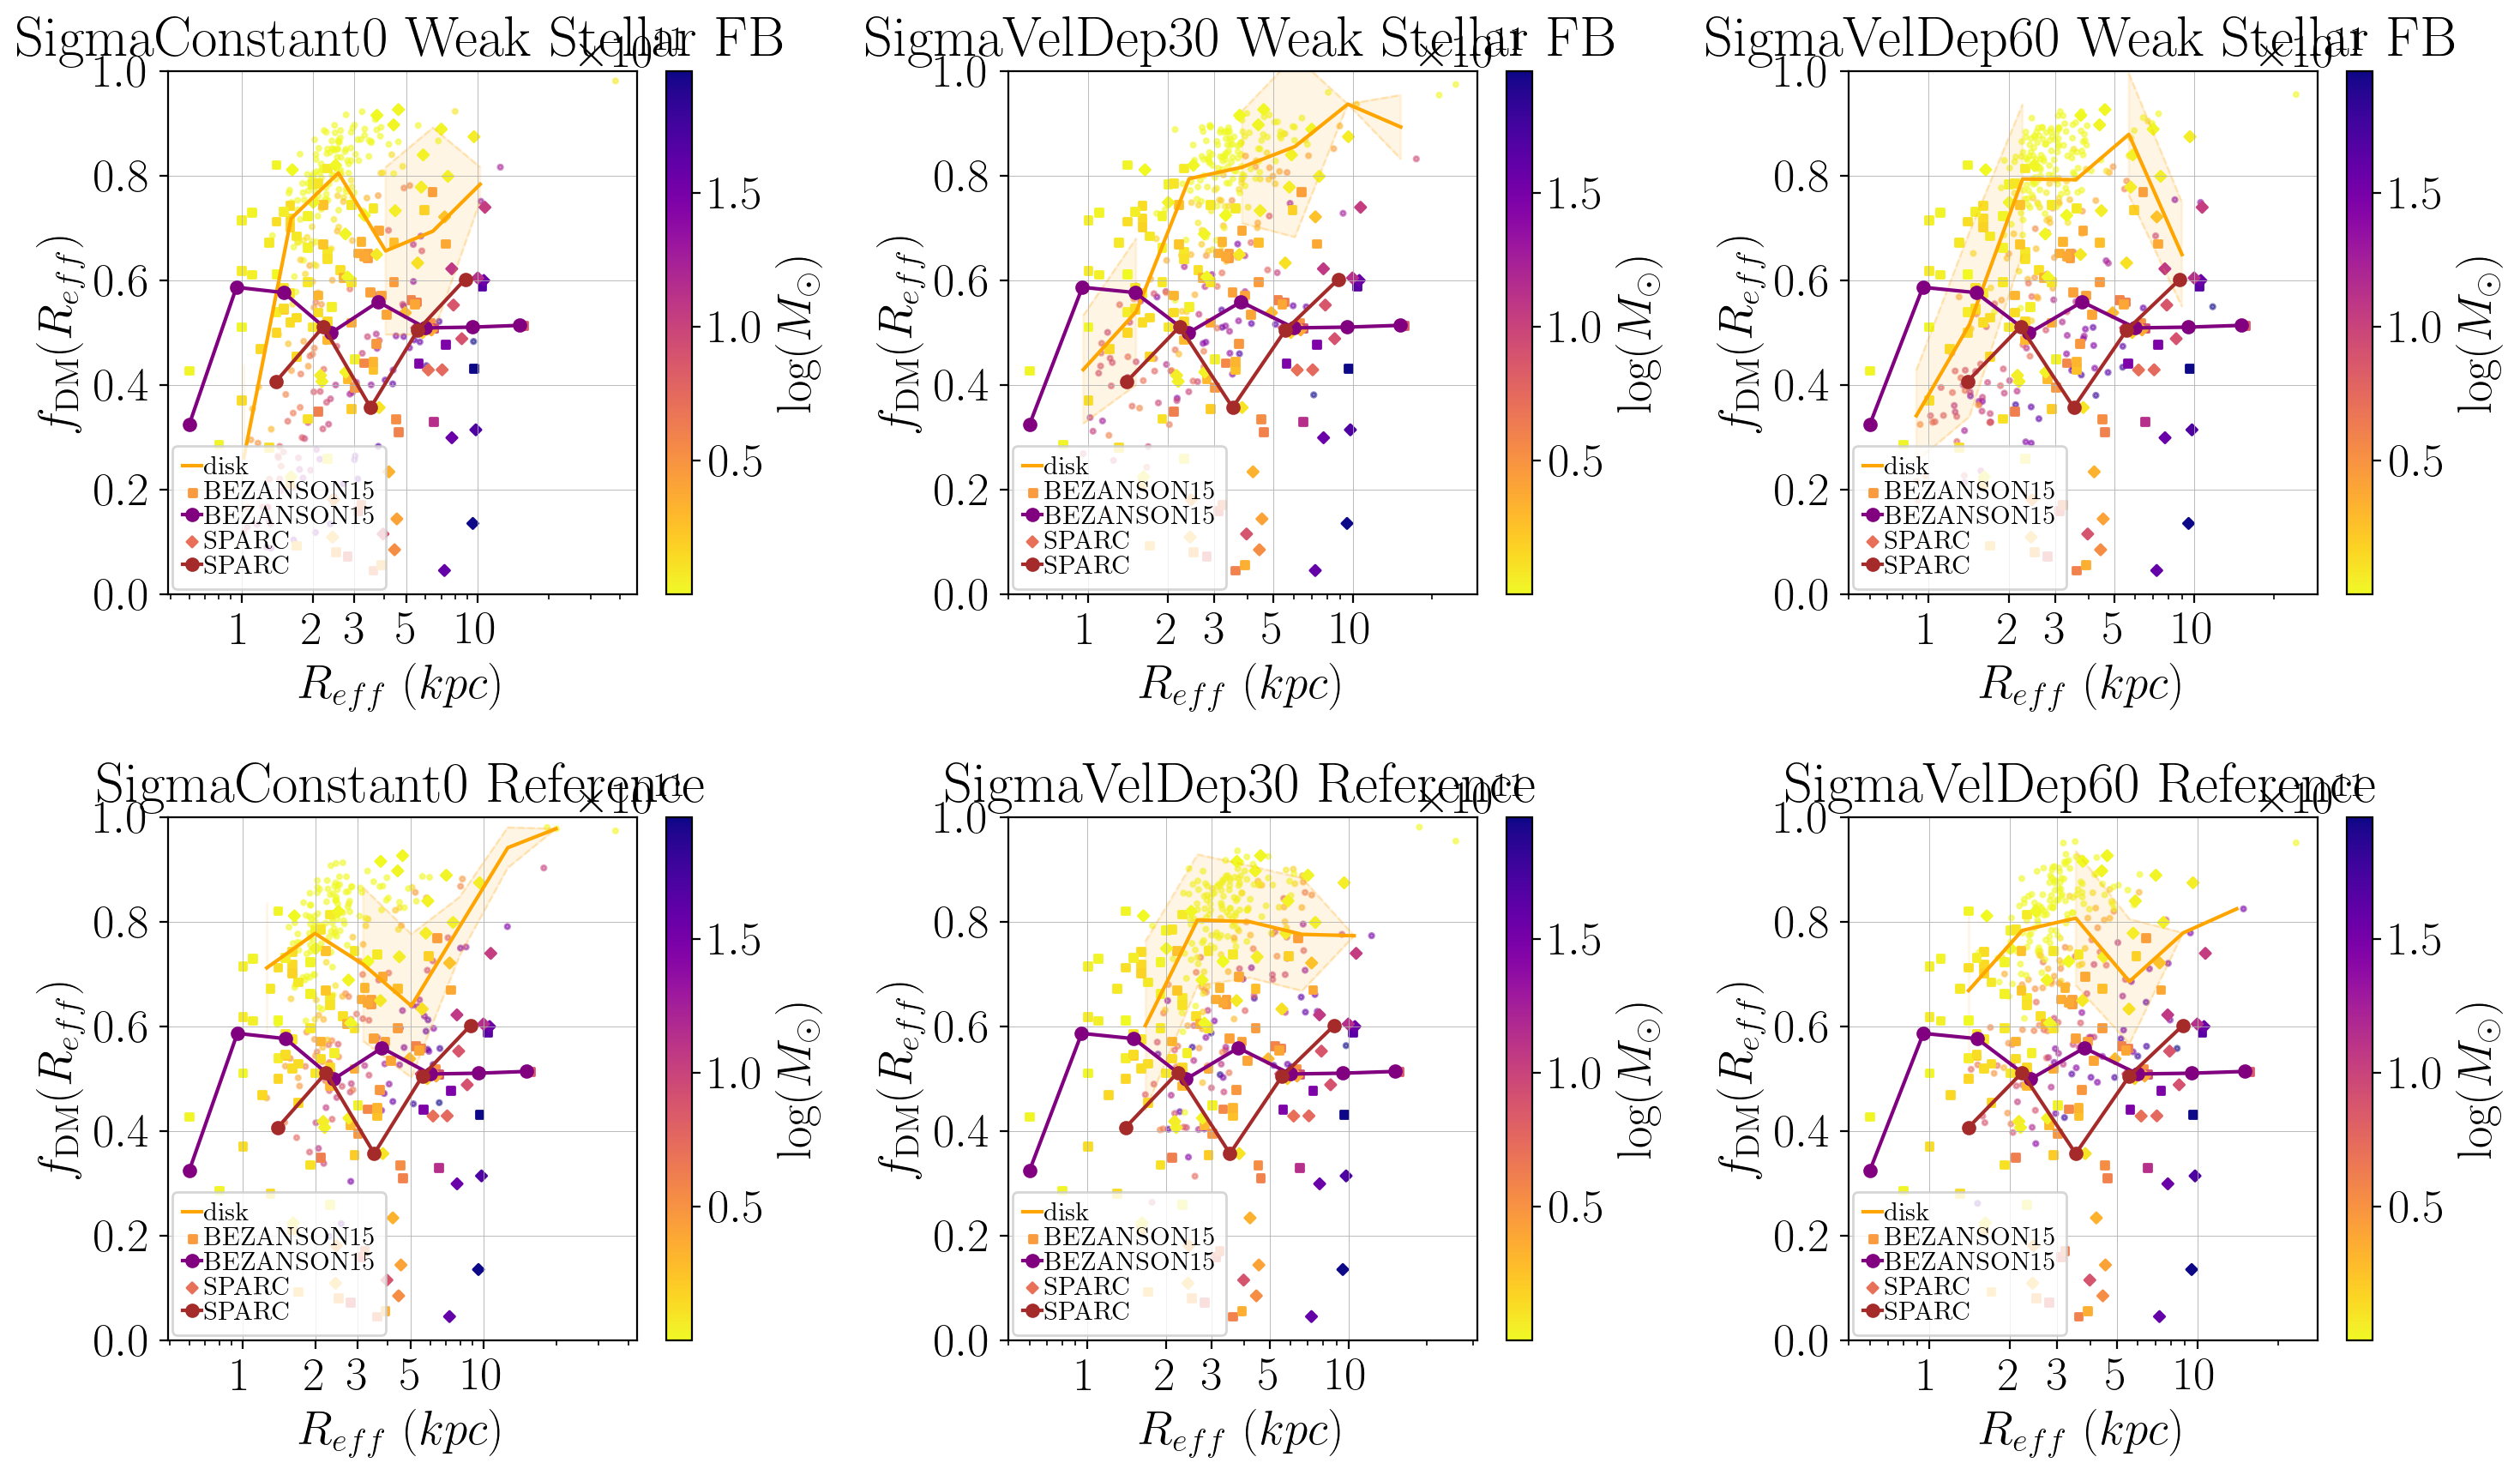

In [74]:
maxval = 6e12
minval = 1e8

nb = 0.2
file_paths = ['Halo_data_L025N376WeakStellarFBSigmaConstant00.hdf5',
              'Halo_data_L025N376WeakStellarFBSigmaVelDep30Anisotropic.hdf5',
              'Halo_data_L025N376WeakStellarFBSigmaVelDep60Anisotropic.hdf5',
              'Halo_data_L025N376ReferenceSigmaConstant00.hdf5', 
              'Halo_data_L025N376ReferenceSigmaVelDep30Anisotropic.hdf5', 
              'Halo_data_L025N376ReferenceSigmaVelDep60Anisotropic.hdf5']

file_names = ['Weak Stellar FB', 'Weak Stellar FB', 'Weak Stellar FB', 'Reference', 'Reference', 'Reference']
titles = ['SigmaConstant0', 'SigmaVelDep30', 'SigmaVelDep60', 'SigmaConstant0', 'SigmaVelDep30', 'SigmaVelDep60']

files = glob.glob('dataset/*.csv')
files[1] = files[-1]
files = files[:-1]
fig, axs = plt.subplots(2, 3, figsize=(15, 9), dpi=200)

for j, file_path in enumerate(file_paths):
    colors = ['orange', 'blue']
    row = j // 3
    col = j % 3

    ax = axs[row, col]


    ax.set_xlabel(r'$R_{eff}$ ($kpc$)')
    ax.set_ylabel(r'$f_{\mathrm{DM}}(R_{eff})$')
    ax.set_ylim([0, 1])
    ax.set_xscale('log')
    ax.set_xticks([1,2,3,5,10], ['1','2','3','5','10'])
    ax.grid(linestyle='-', linewidth=0.3)
    ax.set_title(titles[j] + ' ' + file_names[j])

    halo = classhalo(file_path, type='all')
    i = np.where((10**halo.Mstar<maxval) & (10**halo.Mstar>minval))[0]

    Reff = halo.GalaxyHalfLightRadius[i]
    fDM = halo.fDM[:,i]
    f = []
    for k in range(len(fDM[0, :])):
        f.append(np.interp(halo.GalaxyHalfLightRadius[k], halo.Velocity_radial_bins, fDM[:, k]))

    ax.scatter(Reff, f, c=halo.Mstar[i], cmap = 'plasma_r', vmin = 9, alpha = 0.5)



    bins = 10**np.arange(np.log10(halo.GalaxyHalfLightRadius.min()), np.log10(halo.GalaxyHalfLightRadius.max()), nb)
    
    bin_means, bin_edges, _ = stats.binned_statistic(Reff, f, bins=bins, statistic='median')
    bin_std, _, _ = stats.binned_statistic(Reff, f, bins=bins, statistic='std')
    ax.plot(bin_edges[:-1], bin_means + bin_std, '--', color=colors[0], linewidth=0.8, alpha=0.2)
    ax.plot(bin_edges[:-1], bin_means - bin_std, '--', color=colors[0], linewidth=0.8, alpha=0.2)
    ax.plot(bin_edges[:-1], bin_means, linestyle='-', color=colors[0], label='disk')
    ax.fill_between(bin_edges[:-1], bin_means - bin_std, bin_means + bin_std, alpha=0.1, color=colors[0])
    
    if j%1==0:
        for k, file_path in enumerate(files):
            marker = 's'
            colors = ['purple', 'brown', 'green']
            file_path = files[k]
            name = file_path.split('/')[-1].split('.')[0]
            df = pd.read_csv(file_path)
            M = np.float64(np.array(df["Reff"].iloc[1:].values))
            fDMReff = np.array(df['fDM(Reff)'].iloc[1:].values)
            sigma_fdmReff = np.array(df['sigma_fdm(Reff)'].iloc[1:].values)
            mapmass = np.float64(np.array(df["M*"].iloc[1:].values))
            # Adding the transformation from Salpeter IMF to Chabrier.
            if name == 'CAPPELLARI13':
                M = 10**(np.log10(M)-0.25)
            if name == 'SPARC':
                M = M[tab]
                mapmass = mapmass[tab]
                fDMReff = fDMReff[tab]
                sigma_fdmReff = sigma_fdmReff[tab]
                marker = 'D'
            # Utilisation des couleurs définies pour chaque type de données
            sc = ax.scatter(M, fDMReff, c = mapmass, cmap = 'plasma_r', s=10, marker = marker, label = name)
            
                
            #ax.errorbar(M, fDMReff, yerr=sigma_fdmReff, fmt='o', capsize=1, capthick=1, color=colors[k], alpha = 0.2)
            bins = np.arange(np.log10(M.min()), np.log(M.max()), 0.2)
            bins = 10**bins
            bin_means, bin_edges, _ = stats.binned_statistic(M, fDMReff, bins=bins, statistic='median')
            bin_std, _, _ = stats.binned_statistic(M, fDMReff, bins=bins, statistic='std')

            ax.plot(bin_edges[:-1], bin_means, linestyle='-', marker='o', label=name, c=colors[k], markersize = 5)

            ax.legend(loc=[0.01, 0.01], labelspacing=0.05,
                      handlelength=0.7, handletextpad=0.1,
                      frameon=True, fontsize=11, ncol=1)
        plt.colorbar(sc, ax = ax, label = r'log($M_{\odot})$')

plt.tight_layout()
#plt.savefig('fDMvsR.pdf')
#plt.savefig('fDMvsR.png')
plt.show()
